<a href="https://colab.research.google.com/github/SakibMostafa/CoLAB_Codes/blob/main/Assignment_2_Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replic

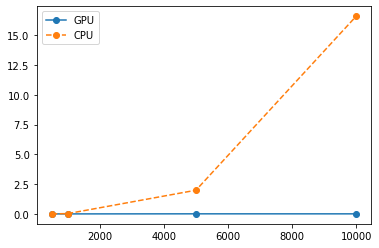

n	CPU			GPU
500	0.0077056884765625	0.001132965087890625
1000	0.026833534240722656	0.002626657485961914
5000	1.9895861148834229	0.008731842041015625
10000	16.58369016647339	0.007130146026611328


In [3]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt

tf.debugging.set_log_device_placement(True)

sizes = [500, 1000, 5000, 10000]

cpu_Time = []
gpu_Time = []
for shapes in sizes:
  mat1 = tf.random.uniform(shape = [shapes, shapes], seed = 10, name="mat1")
  mat2 = tf.random.uniform(shape = [shapes, shapes], seed = 11, name="mat2")
  with tf.device('/CPU:0'):
    start_time = time.time()
    out_a = tf.matmul(mat1, mat2)
    end_time = time.time()
    cpu_Time.append((end_time - start_time))

  with tf.device('/GPU:0'):
    start_time = time.time()
    out_a = tf.matmul(mat1, mat2)
    end_time = time.time()
    gpu_Time.append((end_time - start_time))

fig, ax = plt.subplots()
ax.plot(sizes, gpu_Time, 'o-', label='GPU')
ax.plot(sizes, cpu_Time, 'o--', label='CPU')
leg = ax.legend()
plt.show()

print('n\tCPU\t\t\tGPU')
for i in range(len(sizes)):
  print(str(sizes[i]) + '\t' + str(cpu_Time[i]) + '\t' + str(gpu_Time[i]))